# VK Project
### Network Science, Amantur Amatov


### Analyze graph summary

In [ ]:
import networkx as nx
import numpy as np

In [ ]:
g = nx.read_gexf("friend_list.gexf")

#### **Node atrributes**

In [ ]:
set([k for n in g.nodes for k in g.nodes[n].keys()])

{'city', 'country', 'label', 'name', 'nfriends', 'sex', 'university_name'}

#### **Edge attributes**

In [ ]:
set([k for n in g.edges for k in g.edges[n].keys()])

{'id', 'mutuals'}

#### **Graph's size and order**

In [ ]:
print('Size: {}\nOrder: {}'.format(g.size(), g.order()))

Size: 1721
Order: 256


Number of connected components and number of nodes within each component

In [ ]:
from collections import Counter
cc = [len(c) for c in sorted(nx.connected_components(g), key=len, reverse=True)]
print('There are:')
for c in Counter(cc):
  print('{} connected components with {} elements'.format(Counter(cc)[c], c))

There are:
1 connected components with 238 elements
1 connected components with 3 elements
2 connected components with 2 elements
11 connected components with 1 elements


#### **Diameter and radius**


In [ ]:
largest_component = max(nx.connected_components(g), key=len)
lc = g.subgraph(largest_component).copy()

print('Diameter of graph is {}\nRadius of graph is {}'.format(nx.diameter(lc),
                                                              nx.radius(lc)))

Diameter of graph is 8
Radius of graph is 4


#### **Clustering Coefficients**

In [ ]:
nx.average_clustering(g)

0.5083912531711486

Clustering histogram

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.cm import ScalarMappable
import pandas as pd
from matplotlib.colors import ListedColormap

In [ ]:
cluster_coef = nx.clustering(lc)

Color map

In [ ]:
def my_colormap(name_cmap, alpha):
  cmap = plt.get_cmap(name_cmap)
  my_cmap = cmap(np.arange(cmap.N))
  my_cmap[:,-1] = np.linspace(alpha, 1, cmap.N)
  my_cmap = ListedColormap(my_cmap)
  return my_cmap
def pos_layout(g):
  df = pd.DataFrame(index=g.nodes(), columns=g.nodes())
  for row, data in nx.shortest_path_length(g):
      for col, dist in data.items():
          df.loc[row,col] = dist

  df = df.fillna(df.max().max())
  return df

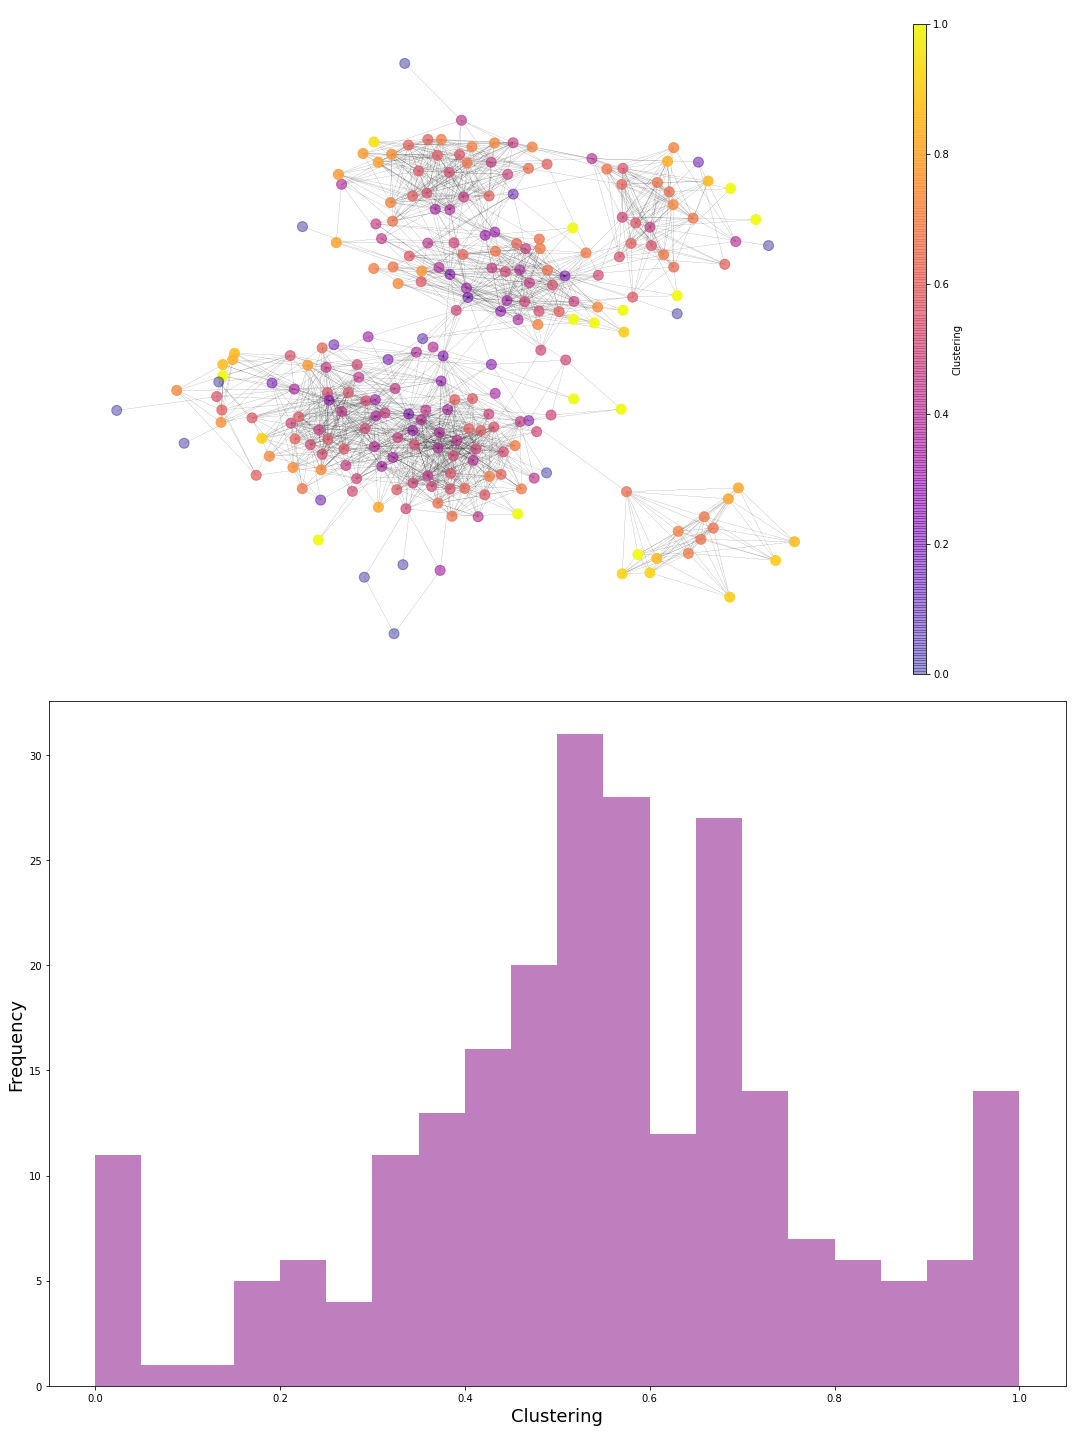

In [ ]:
my_cmap = my_colormap('plasma', 0.4)

norm = plt.Normalize(0, max(cluster_coef.values()))
node_colors = [my_cmap(norm(cluster_coef[node])) for node in lc.nodes]
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15, 20))

df = pos_layout(lc)

pos = nx.kamada_kawai_layout(lc, dist=df.to_dict())
nx.draw(lc, 
        node_color=node_colors, 
        ax=ax1,
        pos=pos, 
        node_size=100, 
        width=0.1)
fig.colorbar(ScalarMappable(cmap=my_cmap, norm=norm), 
             label='Clustering', 
             shrink=0.95, 
             ax=ax1,
             aspect=50)
ax1.tick_params(labelsize=25) 

ax1.margins(0.1,0.1)
ax2.hist(cluster_coef.values(), bins=20,alpha=0.5, color='purple')
ax2.set_xlabel('Clustering', fontsize=18)
ax2.set_ylabel('Frequency', fontsize=18)

plt.tight_layout()
plt.show()

#### **Average path length**

In [ ]:
nx.average_shortest_path_length(lc)

3.4589228096301814

APL for all nodes

In [ ]:
path_len = {path_len[0]:np.mean(list(path_len[1].values())) for path_len in nx.all_pairs_shortest_path_length(lc)}

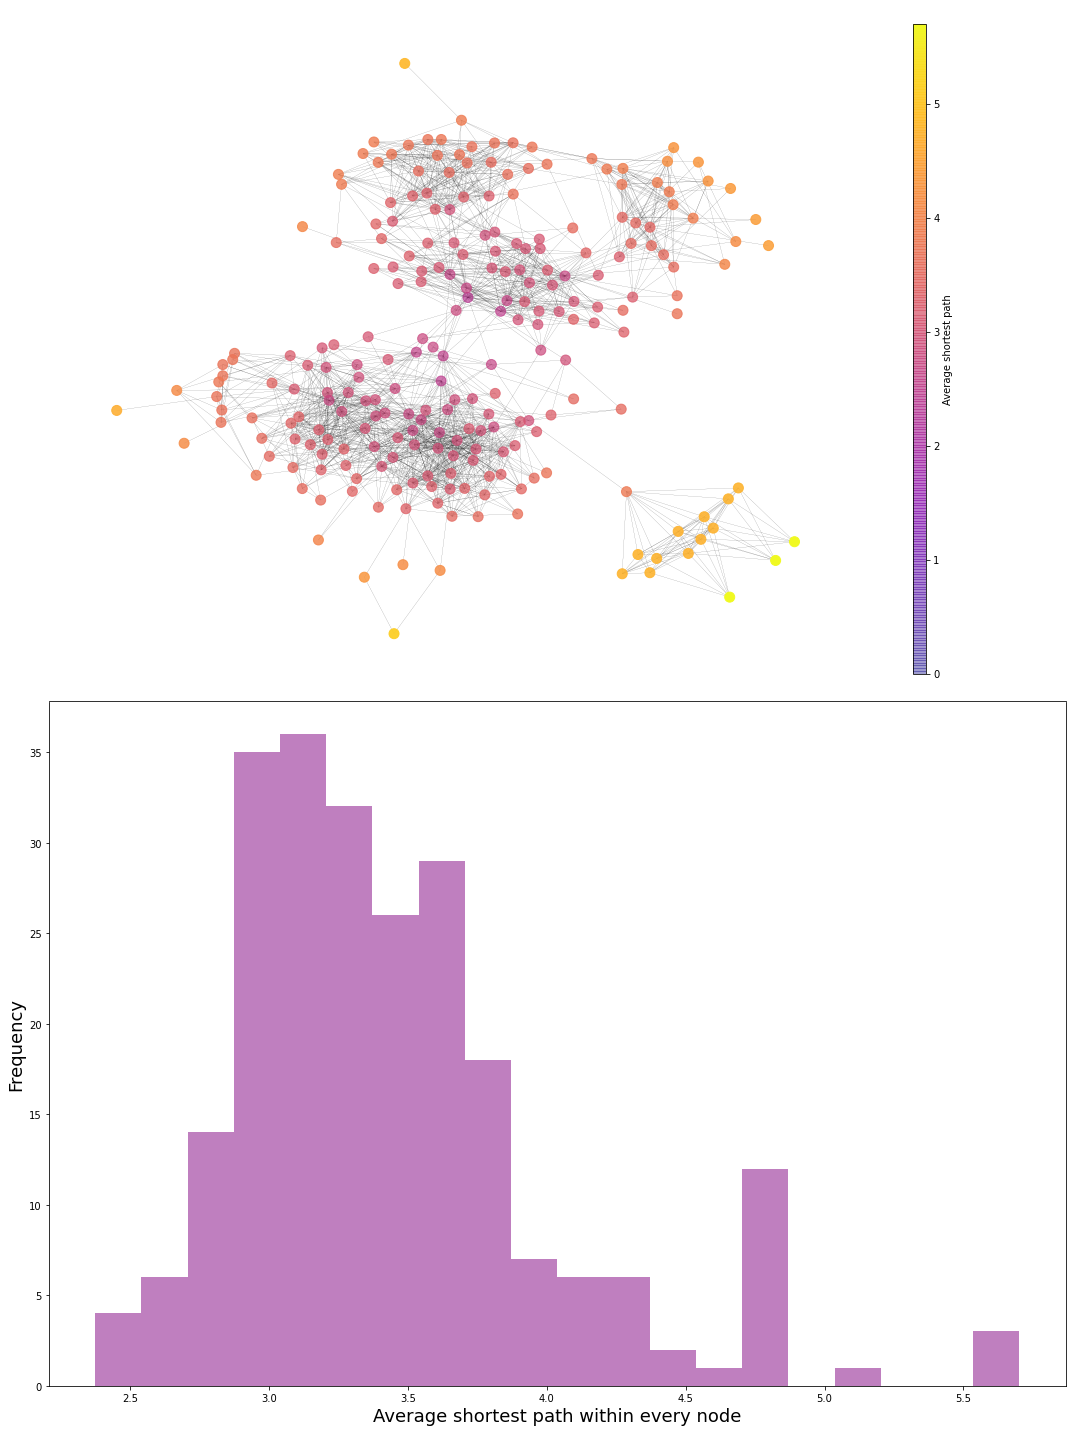

In [ ]:
my_cmap = my_colormap('plasma', 0.4)

norm = plt.Normalize(0, max(path_len.values()))
node_colors = [my_cmap(norm(path_len[node])) for node in lc.nodes]
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15, 20))

pos = nx.kamada_kawai_layout(lc, dist=df.to_dict())
nx.draw(lc, 
        node_color=node_colors, 
        ax=ax1,
        pos=pos, 
        node_size=100, 
        width=0.1)
fig.colorbar(ScalarMappable(cmap=my_cmap, norm=norm), 
             label='Average shortest path', 
             shrink=0.95, 
             ax=ax1,
             aspect=50)
ax1.tick_params(labelsize=25) 

ax1.margins(0.1,0.1)
ax2.hist(path_len.values(), bins=20,alpha=0.5, color='purple')
ax2.set_xlabel('Average shortest path within every node', fontsize=18)
ax2.set_ylabel('Frequency', fontsize=18)

plt.tight_layout()
plt.show()

#### **Degree distribution**

##### CDF and PDF

In [ ]:
def network_pdf(g):
  return [prob/g.number_of_nodes() for prob in nx.degree_histogram(g)]
def network_cdf(g):
  return np.cumsum([prob/g.number_of_nodes() for prob in nx.degree_histogram(g)])

In [ ]:
cdf = network_cdf(lc)
pdf = network_pdf(lc)

<Figure size 1080x720 with 0 Axes>

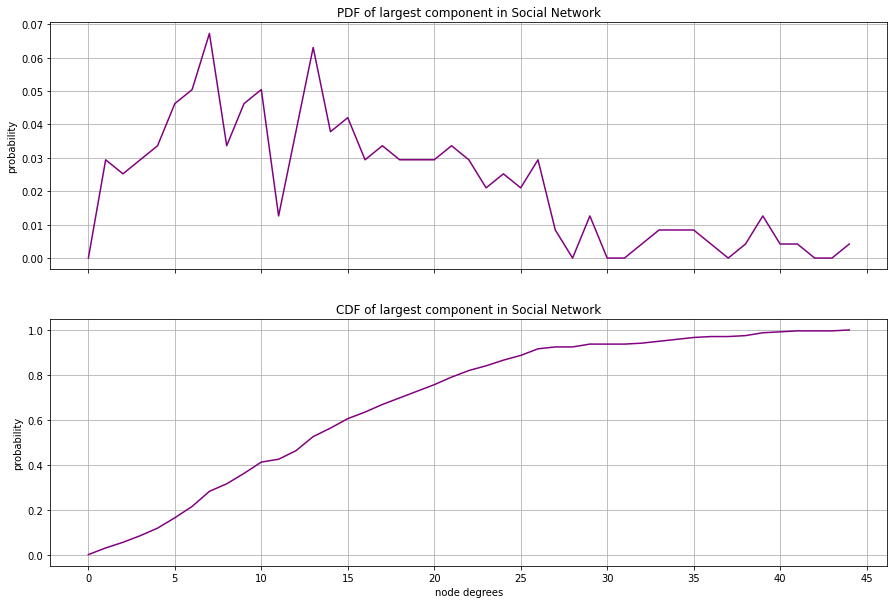

In [ ]:
plt.figure(figsize=(15,10))   
plt.rcParams['axes.grid'] = True
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(15,10))
ax1.plot(pdf, 'purple')
ax1.set_ylabel('probability')
ax1.set_title("PDF of largest component in Social Network")

        
ax2.plot(cdf, color='purple')
ax2.set_ylabel('probability')
ax2.set_xlabel('node degrees')
ax2.set_title('CDF of largest component in Social Network')
ax2.set_xticks(np.arange(0, 50, 5))
plt.show()

##### PDF CDF LogSpace

<Figure size 1080x720 with 0 Axes>

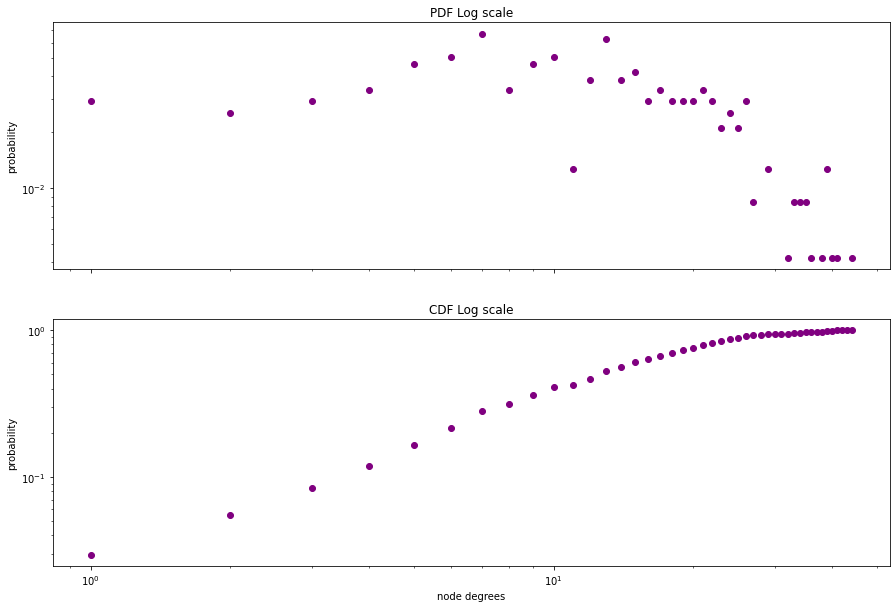

In [ ]:
# in log log scale
plt.figure(figsize=(15,10))   
plt.rcParams['axes.grid'] = False
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(15,10))
ax1.loglog(np.arange(0, len(pdf)), 
           pdf, 
           color='purple', 
           marker='o', 
           linestyle='None')
ax1.set_ylabel('probability')
ax1.set_title('PDF Log scale')
        
ax2.loglog(np.arange(0, len(cdf)), 
           cdf, 
           color='purple', 
           marker='o', 
           linestyle='None')
ax2.set_ylabel('probability')
ax2.set_xlabel('node degrees')
ax2.set_title('CDF Log scale')
plt.show()

##### Fitting PDF

MLE

In [ ]:
import scipy
from scipy import stats

def power_law_cdf(x, alpha=3.5, x_min=1):
    C = (alpha - 1) / x_min ** (1 - alpha)
    return 1 + C * 1/(-alpha + 1) * x ** (-alpha + 1)

def power_law_pdf(x, alpha=3.5, x_min=1):
    C = (alpha - 1) / x_min ** (1 - alpha)
    return C * x ** (-alpha)

def mle_power_law_params(degree_sequence):

  x_max = int(degree_sequence.max())
  x_min = int(degree_sequence.min())
  result_list = []

  while x_min < x_max:
    cutted_degree_sequence = degree_sequence[degree_sequence >= x_min]
    alpha = 1 + cutted_degree_sequence.size * 1/np.sum(np.log(cutted_degree_sequence / x_min))
    kstest = stats.kstest(cutted_degree_sequence, 
                                cdf = lambda x: power_law_cdf(x, alpha, x_min))
    result_list.append((alpha, x_min, kstest[0]))
    x_min += 1
    
  return min(result_list, key = lambda t: t[2])[:2]

Regression

In [ ]:
from sklearn.linear_model import LinearRegression

def alpha_log_bins(x_train, bins):
  binning = np.logspace(np.log10(x_train.min()), np.log10(x_train.max()), bins)
  histogram = np.histogram(x_train, bins=binning, density=True)
  density = histogram[0][np.where(histogram[0] != 0)]
  density = np.log(density / len(x_train))
  bin_centres = np.log((histogram[1][1:] + histogram[1][:-1]) / 2)
  bin_centres = bin_centres[np.where(histogram[0] != 0)]
  bin_centres = bin_centres.reshape(-1, 1)
  regression = LinearRegression()
  regression.fit(bin_centres, density)
  
  return abs(regression.coef_[-1])

<Figure size 1080x720 with 0 Axes>

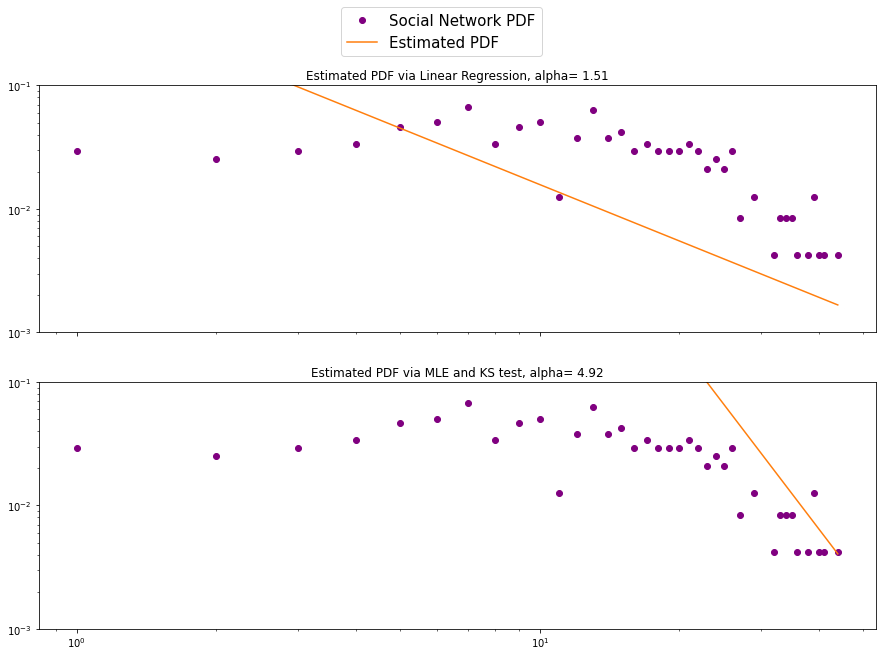

In [ ]:
bins = 100
degree_sequence = np.array(list(dict(nx.degree(lc)).values()))
x_min = degree_sequence.min()

binning = np.logspace(np.log10(x_min), np.log10(degree_sequence.max()), bins)
hist, bin_edges = np.histogram(degree_sequence, bins=binning, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
x_space = np.linspace(x_min, degree_sequence.max(), 100)


plt.figure(figsize=(15,10))   
plt.rcParams['axes.grid'] = False
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(15,10))


ax1.loglog(np.arange(0, len(pdf)), 
           pdf, 
           color='purple', 
           marker='o', 
           linestyle='None',
           label='Social Network PDF')
hat_alpha_reg = alpha_log_bins(degree_sequence, bins)
ax1.loglog(x_space, power_law_pdf(x_space, hat_alpha_reg, x_min), 
         label='Estimated PDF', c='tab:orange')
ax1.set_title('Estimated PDF via Linear Regression, alpha= {:.2f}'.format(hat_alpha_reg))
ax1.set_ylim(0.001, 0.1)
        
ax2.loglog(np.arange(0, len(pdf)), 
           pdf, 
           color='purple', 
           marker='o', 
           linestyle='None',
           label='Social Network PDF')
hat_alpha, hat_x_min = mle_power_law_params(degree_sequence)
ax2.loglog(x_space, power_law_pdf(x_space, hat_alpha, hat_x_min), 
         label='Estimated PDF', c='tab:orange')
ax2.set_title('Estimated PDF via MLE and KS test, alpha= {:.2f}'.format(hat_alpha))
ax2.set_ylim(0.001, 0.1)
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', prop={'size': 15})

plt.show()

Before going to structure analysis let me show some fancy visualization of features that I took from API 

### Fancy Plots

1. Graph where we can see number of friends as size of nodes, number of mutual friends as width of edges, and colormap of nodes for its degree.

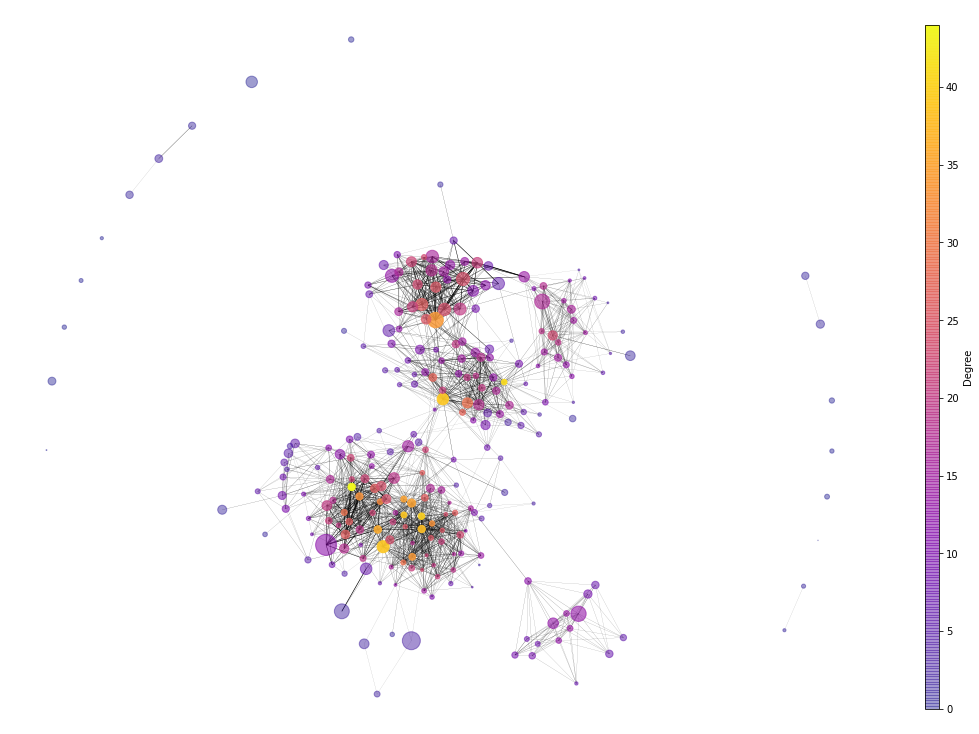

In [ ]:
my_cmap = my_colormap('plasma', 0.4)


node_degree = nx.degree(g)
norm = plt.Normalize(0, max(dict(node_degree).values()))
node_colors = [my_cmap(norm(dict(node_degree)[node])) for node in g.nodes]
node_size = [val["nfriends"]/5 for key, val in g.nodes().items()]
edge_width = np.array([g[u][v]['mutuals'] for u,v in g.edges()])
edge_width_norm = edge_width/np.max(edge_width)

plt.figure(figsize=(15, 10))
df_g = pos_layout(g)
pos = nx.kamada_kawai_layout(g, dist=df_g.to_dict())
nx.draw(g, 
        node_color=node_colors, 
        pos=pos, 
        node_size=node_size,
        width=edge_width_norm+0.05)
plt.colorbar(ScalarMappable(cmap=my_cmap, norm=norm), 
             label='Degree', 
             shrink=0.95,
             aspect=50)
plt.show()

Secrets Info

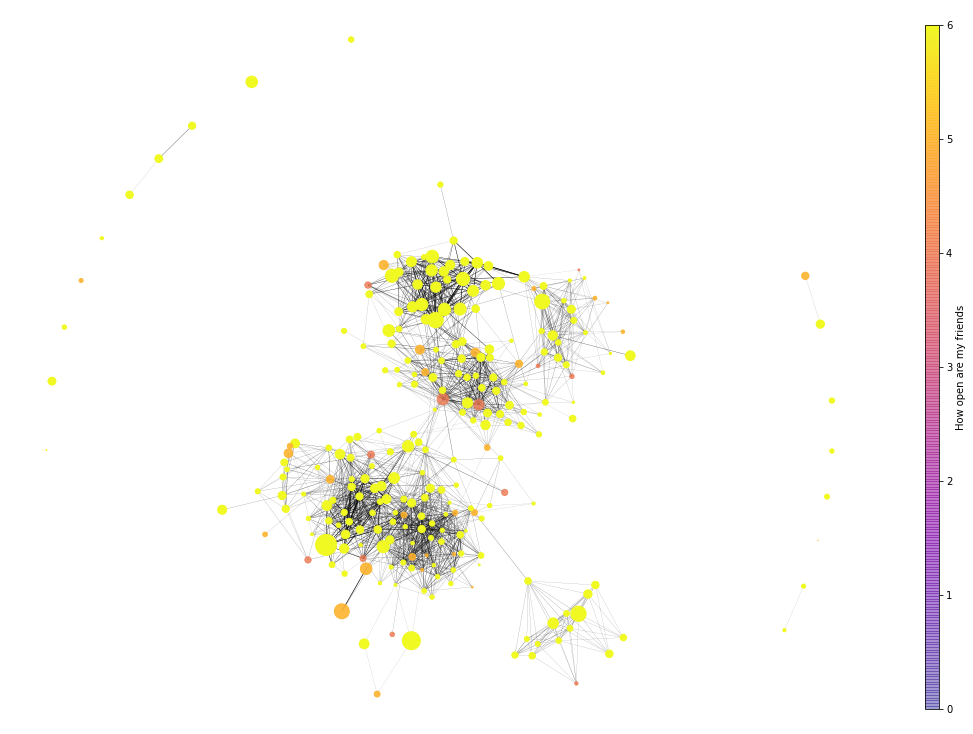

In [ ]:
my_cmap = my_colormap('plasma', 0.4)


node_degree = {node:len(g.nodes()[node].keys()) for node in g.nodes()}
norm = plt.Normalize(0, max(dict(node_degree).values()))
node_colors = [my_cmap(norm(dict(node_degree)[node])) for node in g.nodes]
node_size = [val["nfriends"]/5 for key, val in g.nodes().items()]
edge_width = np.array([g[u][v]['mutuals'] for u,v in g.edges()])
edge_width_norm = edge_width/np.max(edge_width)

plt.figure(figsize=(15, 10))
df_g = pos_layout(g)
pos = nx.kamada_kawai_layout(g, dist=df_g.to_dict())
nx.draw(g, 
        node_color=node_colors, 
        pos=pos, 
        node_size=node_size,
        width=edge_width_norm+0.05)
plt.colorbar(ScalarMappable(cmap=my_cmap, norm=norm), 
             label='How open are my friends', 
             shrink=0.95,
             aspect=50)
plt.show()

Sex info

In [ ]:
from collections import Counter
sex_info = Counter(nx.get_node_attributes(g,'sex').values()).most_common()
print('There are {} male friends and {} female friends.'.format(sex_info[0][1],sex_info[1][1]))

There are 156 male friends and 100 female friends.


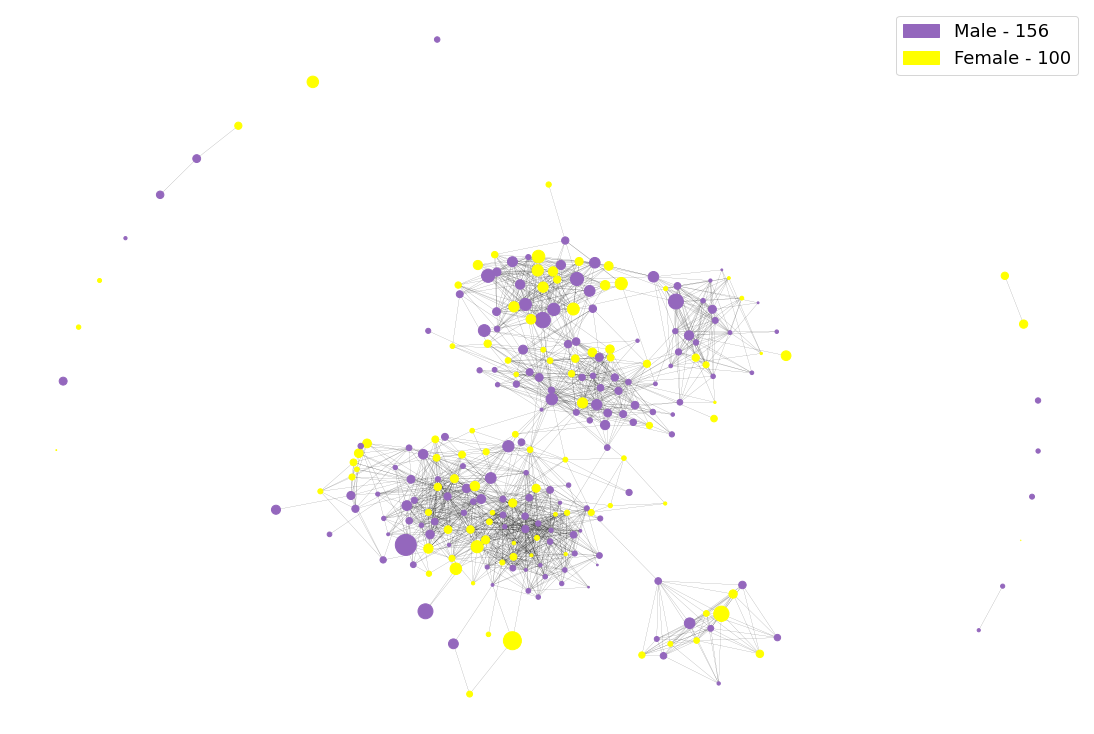

In [ ]:
import matplotlib.patches as mpatches

node_sex = nx.get_node_attributes(g,'sex') 
node_colors = ['yellow' if node_sex[node] == 1 else 'tab:purple' for node in g.nodes]
node_size = [val["nfriends"]/5 for key, val in g.nodes().items()]

plt.figure(figsize=(15, 10))
df_g = pos_layout(g)
pos = nx.kamada_kawai_layout(g, dist=df_g.to_dict())
nx.draw(g, 
        node_color=node_colors, 
        pos=pos, 
        node_size=node_size,
        width=0.1)
purple_patch = mpatches.Patch(color='tab:purple', label='Male - '+str(sex_info[0][1]))
yellow_patch = mpatches.Patch(color='yellow', label='Female - '+str(sex_info[1][1]))

plt.legend(handles=[purple_patch, yellow_patch], fontsize=18)

plt.show()

Country

In [ ]:
ctr_info = Counter(nx.get_node_attributes(g,'country').values()).most_common()

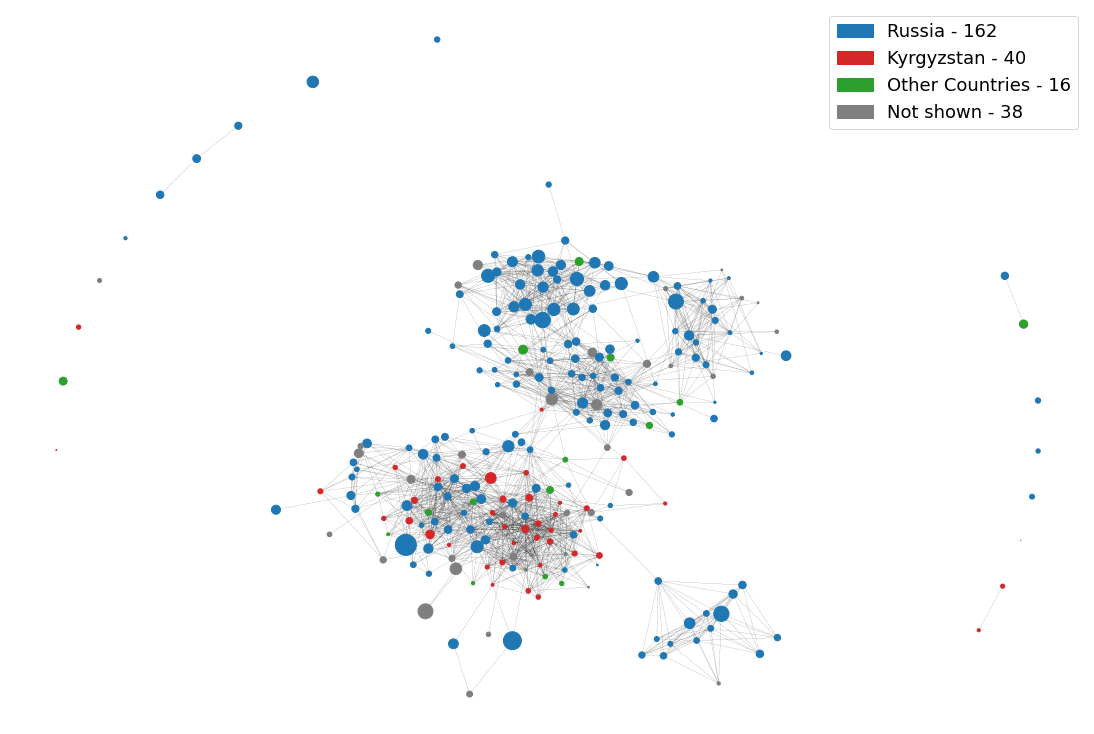

In [ ]:
countries = nx.get_node_attributes(g,'country')
node_colors = []
for node in g.nodes:
  if node not in countries:
    node_colors.append('tab:gray')
  elif node in countries and 'Россия' in countries[node]:
    node_colors.append('tab:blue')
  elif node in countries and 'Кыргызстан' in countries[node]:
    node_colors.append('tab:red')
  else:
    node_colors.append('tab:green')

node_size = [val["nfriends"]/5 for key, val in g.nodes().items()]

plt.figure(figsize=(15, 10))
df_g = pos_layout(g)
pos = nx.kamada_kawai_layout(g, dist=df_g.to_dict())
nx.draw(g, 
        node_color=node_colors, 
        pos=pos, 
        node_size=node_size,
        width=0.1)
russia_patch = mpatches.Patch(color='tab:blue', 
                              label='Russia - '+str(ctr_info[0][1]))
kgz_patch = mpatches.Patch(color='tab:red', 
                           label='Kyrgyzstan - ' + str(ctr_info[1][1]))
other_patch = mpatches.Patch(color='tab:green', 
                             label='Other Countries - ' + str(len(countries)-ctr_info[0][1]-ctr_info[1][1]))
not_listed_patch = mpatches.Patch(color='tab:gray', label='Not shown - '+ str(len(nx.degree(g)) - len(countries)))


plt.legend(handles=[russia_patch, kgz_patch, other_patch, not_listed_patch], fontsize=18)

plt.show()

Cities

In [ ]:
cit_info = Counter(nx.get_node_attributes(g,'city').values()).most_common()

There are:

85 friends from Saint Petersburg,

53 friends from Moscow,

39 friends from Bishkek,

79 friends from other cities.


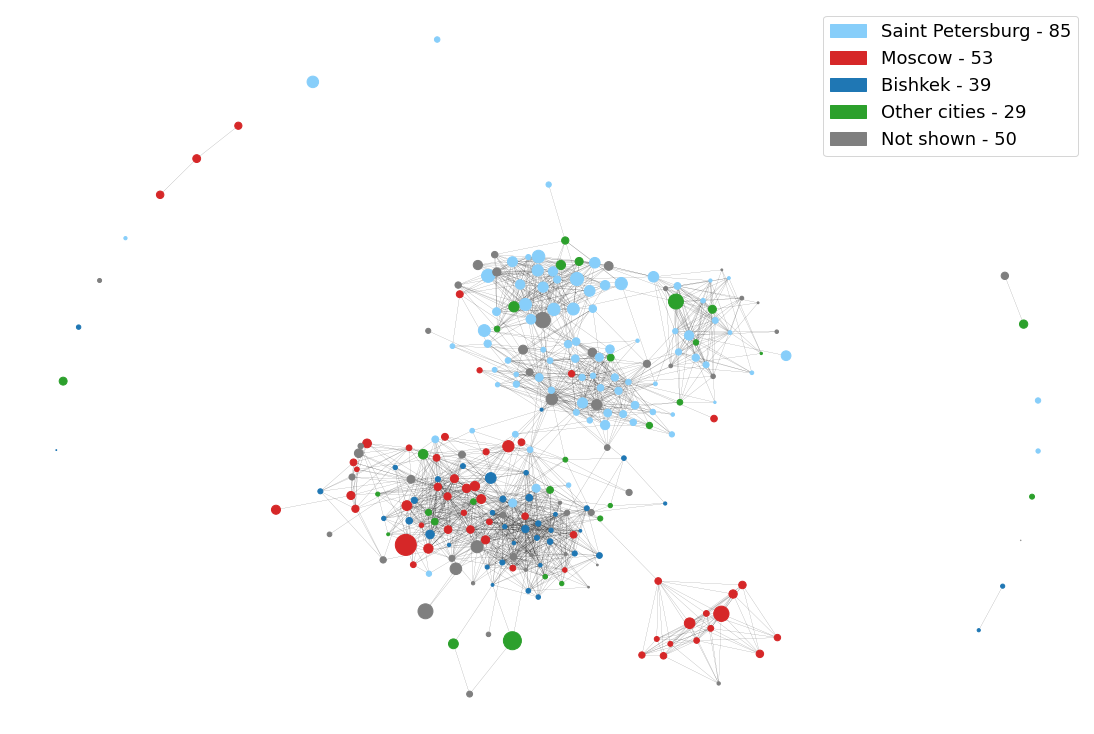

In [ ]:
# g_rus = g.copy()
# remove_not_rus = [node for node in countries if 'Россия' not in countries[node]]
# g_rus.remove_nodes_from(remove_not_rus)

cities = nx.get_node_attributes(g,'city')
node_colors = []
for node in g.nodes:
  if node not in cities:
    node_colors.append('tab:gray')
  elif node in cities and 'Москва' in cities[node]:
    node_colors.append('tab:red')
  elif node in cities and 'Санкт-Петербург' in cities[node]:
    node_colors.append('lightskyblue')
  elif node in cities and 'Бишкек' in cities[node]:
    node_colors.append('tab:blue')
  else:
    node_colors.append('tab:green')

node_size = [val["nfriends"]/5 for key, val in g.nodes().items()]

plt.figure(figsize=(15, 10))
df_g = pos_layout(g)
pos = nx.kamada_kawai_layout(g, dist=df_g.to_dict())
nx.draw(g, 
        node_color=node_colors, 
        pos=pos, 
        node_size=node_size,
        width=0.1)
moscow_patch = mpatches.Patch(color='tab:red', 
                              label='Moscow - '+str(cit_info[1][1]))
spb_patch = mpatches.Patch(color='lightskyblue', 
                           label='Saint Petersburg - '+str(cit_info[0][1]))
bish_patch = mpatches.Patch(color='tab:blue', 
                            label='Bishkek - '+str(cit_info[2][1]))
other_patch = mpatches.Patch(color='tab:green', 
                             label='Other cities - '+str(len(cities)-cit_info[0][1]
                                                                    -cit_info[1][1]
                                                                    -cit_info[2][1]))
not_listed_patch = mpatches.Patch(color='tab:gray', label='Not shown - ' + str(len(nx.degree(g))-len(cities)))


plt.legend(handles=[spb_patch, moscow_patch, bish_patch, other_patch, not_listed_patch], 
           fontsize=18)

plt.show()

Universities

In [ ]:
uni_info = Counter(nx.get_node_attributes(g,'university_name').values()).most_common()
uni_info

NameError: ignored

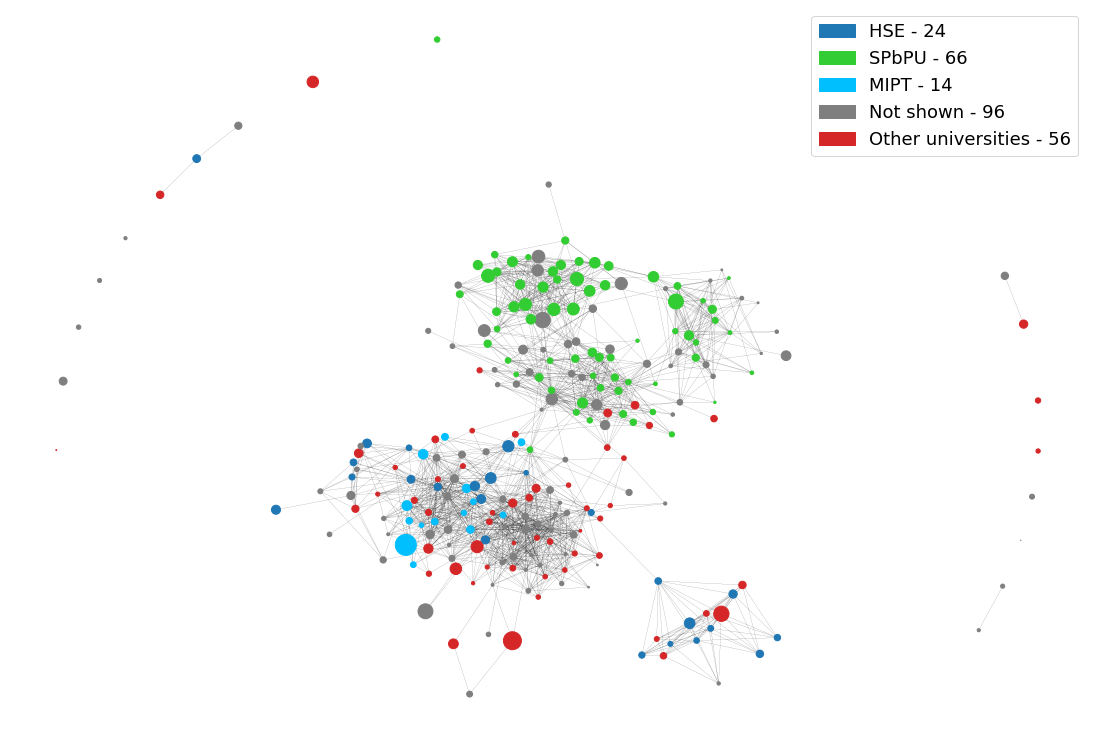

In [ ]:
universities = nx.get_node_attributes(g,'university_name')

node_colors = []
for node in g.nodes:
  if node not in universities or universities[node]=='':
    node_colors.append('tab:gray')
  elif node in universities and universities[node]=='СПбПУ Петра Великого (Политех)':
    node_colors.append('limegreen')
  elif node in universities and universities[node]=='НИУ ВШЭ (ГУ-ВШЭ)':
    node_colors.append('tab:blue')
  elif node in universities and universities[node]=='МФТИ (Физтех)':
    node_colors.append('deepskyblue')
  else:
    node_colors.append('tab:red')

node_size = [val["nfriends"]/5 for key, val in g.nodes().items()]

plt.figure(figsize=(15, 10))
df_g = pos_layout(g)
pos = nx.kamada_kawai_layout(g, dist=df_g.to_dict())
nx.draw(g, 
        node_color=node_colors, 
        pos=pos, 
        node_size=node_size,
        width=0.1)
hse_patch = mpatches.Patch(color='tab:blue', 
                           label='HSE - ' + str(uni_info[2][1]))
spbpu_patch = mpatches.Patch(color='limegreen', 
                             label='SPbPU - ' + str(uni_info[0][1]))
mipt_patch = mpatches.Patch(color='deepskyblue', 
                            label='MIPT - ' + str(uni_info[3][1]))
other_patch = mpatches.Patch(color='tab:red', 
                             label='Other universities - ' + str(len(universities)
                                                                 -uni_info[0][1]
                                                                 -uni_info[1][1]
                                                                 -uni_info[2][1]
                                                                 -uni_info[3][1]))
not_listed_patch = mpatches.Patch(color='tab:gray', 
                                  label='Not shown - ' + str(len(nx.degree(g))
                                                            -len(universities)
                                                            +uni_info[1][1]))


plt.legend(handles=[hse_patch, spbpu_patch, mipt_patch, not_listed_patch, other_patch], 
           fontsize=18)

plt.show()